<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11398.000000,1.058900e+04,1.058200e+04,11276.000000,8972.000000,11111.000000
mean,12490.392437,7.570477e+05,1.315967e+05,42.064606,4.781071,30.778895
std,7235.461999,9.705598e+06,2.947865e+05,24.672741,4.567060,7.393686
min,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,6264.250000,2.500000e+04,2.686800e+04,40.000000,2.000000,25.000000
50%,12484.000000,6.500000e+04,5.774500e+04,40.000000,4.000000,29.000000
75%,18784.750000,1.200000e+05,1.000000e+05,43.000000,5.000000,35.000000
max,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [4]:
df_ConvertedComp_counts= df["ConvertedComp"].value_counts().to_frame()
df_ConvertedComp_counts.rename(columns={"ConvertedComp": "value_counts"}, inplace=True)
df_ConvertedComp_counts

,value_counts
2000000.0,138
1000000.0,105
100000.0,99
150000.0,92
120000.0,86
...,...
223000.0,1
49086.0,1
157460.0,1
5844.0,1


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [5]:
# your code goes here
import matplotlib.pyplot as plt
import numpy as np

In [6]:
%matplotlib inline

In [7]:
#!conda install seaborn==0.11.1
!pip install seaborn==0.11.1

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [8]:
import seaborn as sns

In [9]:
sns.__version__

'0.11.1'

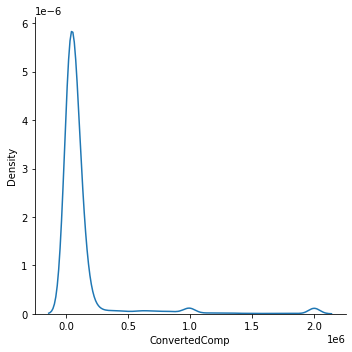

In [10]:
sns.displot(df['ConvertedComp'], kind='kde')

Plot the histogram for the column `ConvertedComp`.


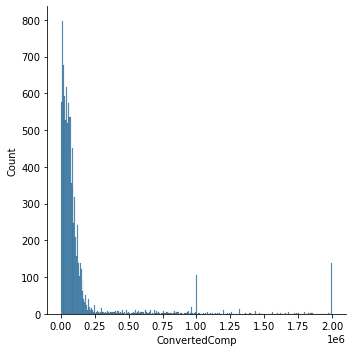

In [11]:
# your code goes here
sns.displot(df['ConvertedComp'])

What is the median of the column `ConvertedComp`?


In [23]:
# your code goes here
median_CC = df['ConvertedComp'].median()
median_CC

57745.0

How many responders identified themselves only as a **Man**?


In [13]:
pd.set_option('display.max_rows', None) 
df.dtypes

Respondent                  int64
MainBranch                 object
Hobbyist                   object
OpenSourcer                object
OpenSource                 object
Employment                 object
Country                    object
Student                    object
EdLevel                    object
UndergradMajor             object
EduOther                   object
OrgSize                    object
DevType                    object
YearsCode                  object
Age1stCode                 object
YearsCodePro               object
CareerSat                  object
JobSat                     object
MgrIdiot                   object
MgrMoney                   object
MgrWant                    object
JobSeek                    object
LastHireDate               object
LastInt                    object
FizzBuzz                   object
JobFactors                 object
ResumeUpdate               object
CurrencySymbol             object
CurrencyDesc               object
CompTotal     

In [14]:
# your code goes here
df_Gender_counts= df['Gender'].value_counts()
df_Gender_counts

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

#### Total responders identified themselves only as a Man are 10480. 

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


#### Total responders identified themselves only as a Woman are 731. 

### Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [15]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [26]:
df['Age'].median()

29.0

### Based on the boxplot of ‘Age’ how many outliers do you see below Q1?

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


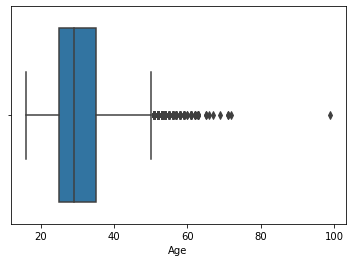

In [17]:
sns.boxplot(df['Age'])

Plot a histogram of the column `Age`.


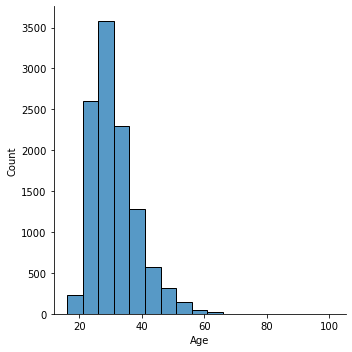

In [18]:
# your code goes here
sns.displot(df['Age'], binwidth=5)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


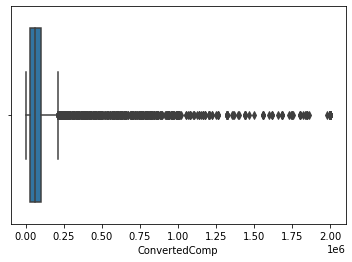

In [19]:
# your code goes here
sns.boxplot(df['ConvertedComp'])

#### The interquartile range, often denoted “IQR”, is a way to measure the spread of the middle 50% of a dataset. It is calculated as the difference between the first quartile* (the 25th percentile) and the third quartile (the 75th percentile) of a dataset. 

In [20]:
# your code goes here
df['ConvertedComp'].dropna()

0          61000.0
1          95179.0
2          90000.0
3         455352.0
4          65277.0
5          31140.0
6          41244.0
7         103000.0
8          69000.0
9          26388.0
10          6300.0
11        114000.0
12        100000.0
13       1100000.0
14         51312.0
15        156000.0
16         20623.0
17         87996.0
18         60000.0
19          5597.0
20         47300.0
21         68268.0
22         51150.0
23         97389.0
24        107000.0
25         66000.0
26         87994.0
27         36265.0
28         11194.0
29         75000.0
30          4128.0
31        114575.0
32         17491.0
33         39254.0
34          7696.0
36        117540.0
37          3468.0
38         16008.0
39         36060.0
40         16788.0
41         57287.0
42         43180.0
43        110000.0
44         66750.0
45        229016.0
46       2000000.0
47          2169.0
48         46368.0
49        100000.0
51         53437.0
52         39768.0
53        103117.0
54         2

In [21]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['ConvertedComp'].describe()

count     10582.00
mean     131596.73
std      294786.52
min           0.00
25%       26868.00
50%       57745.00
75%      100000.00
max     2000000.00
Name: ConvertedComp, dtype: float64

In [27]:
# median age before changes to the df
median_CC

57745.0

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [28]:
##Find out the Inter Quartile Range for the column ConvertedComp.
q3=df['ConvertedComp'].quantile(0.75)
q1=df['ConvertedComp'].quantile(0.25)
iqr=q3-q1
iqr

73132.0

### Find out the upper and lower bounds.

Based on this calculation, the interquarter range is 73,132

In [29]:
Lower=q1-1.5*iqr
Lower

-82830.0

In [30]:
Upper=q3+1.5*iqr
Upper

209698.0

Identify how many outliers are there in the `ConvertedComp` column.


In [31]:
# your code goes here
df[(df['ConvertedComp'] < Lower) | (df['ConvertedComp'] > Upper)].ConvertedComp.count()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [34]:
df = df[(df['ConvertedComp'] <= Upper)]

In [ ]:
# Test to see if outliers are gone:

In [35]:
df[(df['ConvertedComp'] < Lower) | (df['ConvertedComp'] > Upper)].ConvertedComp.count()

0

### What is the median ConvertedComp after removing outliers?

In [37]:
df['ConvertedComp'].median()

52704.0

### What is the mean ConvertedComp after removing outliers? 

In [38]:
df["ConvertedComp"].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [44]:
df.dtypes

Respondent                  int64
MainBranch                 object
Hobbyist                   object
OpenSourcer                object
OpenSource                 object
Employment                 object
Country                    object
Student                    object
EdLevel                    object
UndergradMajor             object
EduOther                   object
OrgSize                    object
DevType                    object
YearsCode                  object
Age1stCode                 object
YearsCodePro               object
CareerSat                  object
JobSat                     object
MgrIdiot                   object
MgrMoney                   object
MgrWant                    object
JobSeek                    object
LastHireDate               object
LastInt                    object
FizzBuzz                   object
JobFactors                 object
ResumeUpdate               object
CurrencySymbol             object
CurrencyDesc               object
CompTotal     

In [53]:

df_corr = df.corr(method='pearson', min_periods=1)
df_corr= df_corr.drop(['Respondent','CompTotal','ConvertedComp','WorkWeekHrs','CodeRevHrs'],axis=0);
df_corr.drop(['Age'],axis=1)


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs
Age,0.00,0.01,0.40,0.03,-0.01


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
